In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

###  Used CHIME catalogue for this part

In [2]:
col_names = ['tns_name', 'ra', 'dec', 'bonsai_dm', 'width_fitb', 'flux']
chime_df = pd.read_csv('chimefrbcat1.csv',  usecols=col_names)

In [3]:
chime_df.head()

,tns_name,ra,dec,bonsai_dm,flux,width_fitb
0,FRB20180725A,93.42,67.07,716.6,1.70,0.000296
1,FRB20180727A,197.72,26.42,642.1,0.58,0.00139
2,FRB20180729A,199.40,55.58,108.4,11.70,<0.00010
3,FRB20180729B,89.93,56.50,318.6,0.92,0.000314
4,FRB20180730A,57.39,87.19,849.2,5.20,0.000468


Text(0.5, 1.0, 'FRB positions in the sky')

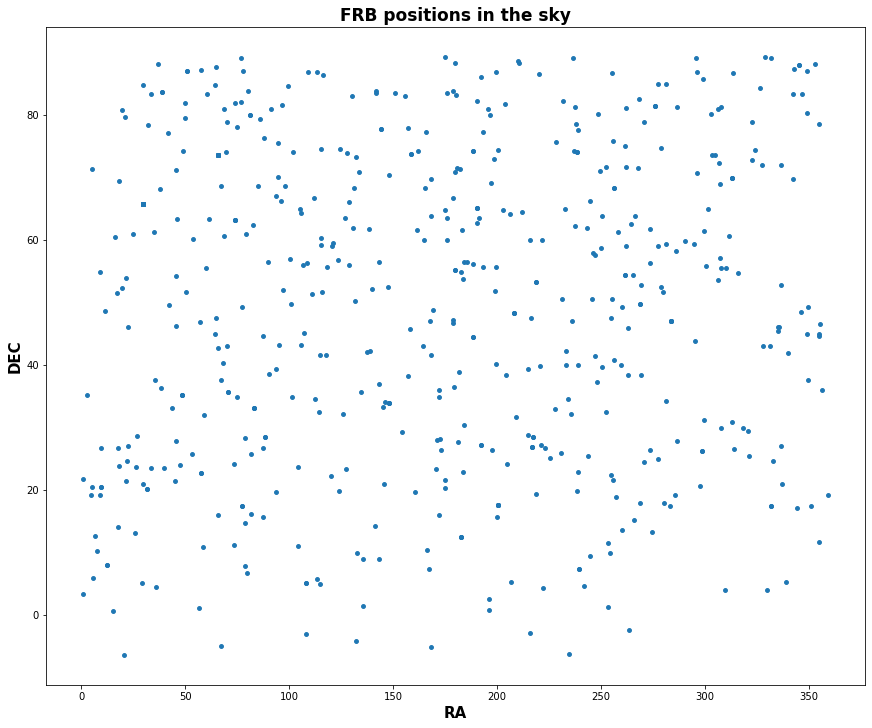

In [4]:
fig, ax_position = plt.subplots(figsize = (12, 10), layout = 'constrained')
ax_position.scatter(chime_df['ra'], chime_df['dec'], s = 15)
ax_position.set_xlabel('RA', size = 15, weight = 'bold')
ax_position.set_ylabel('DEC', size = 15, weight = 'bold')
ax_position.set_title('FRB positions in the sky', size = 17, weight = 'bold')

Position map of FRBs show that they are uniformly ditributed all over the sky which indicates that FRB sources are located all over the sky. Since these data are taken by CHIME(Canadian radio telescope) it covers northern sky only. 

### Used HeRTA catalogue from here onwards

In [43]:
# Use this data frame only to check the data and its characteristics and this box is independent to any other code 
# boxes below.

df = pd.read_csv('herta_frb_catalogue.csv')


In [44]:
columns = ['ra', 'dec', 'dm', 'flux', 'redshift', 'frb', 'l', 'b', 'width']
herta_df = pd.read_csv('herta_frb_catalogue.csv', usecols=columns).replace('-', '0')
print('No of Rows =', herta_df.shape[0])
herta_df.head(3)

No of Rows = 806


,frb,ra,dec,l,b,dm,flux,width,redshift
0,FRB 20010125A,19:06:53,-40:37:14,356.64,-20.02,790.3,0.54,0,0.7083
1,FRB 20010305A,4:57:20,-52:36:25,260.07,-38.35,350.0,0.42,9,0.341
2,FRB 20010312A,5:26:55,-64:56:19,274.72,-33.30,1187.0,0.25,0,1.0897


Text(0.5, 1.0, 'Position of FRB sources in the sky')

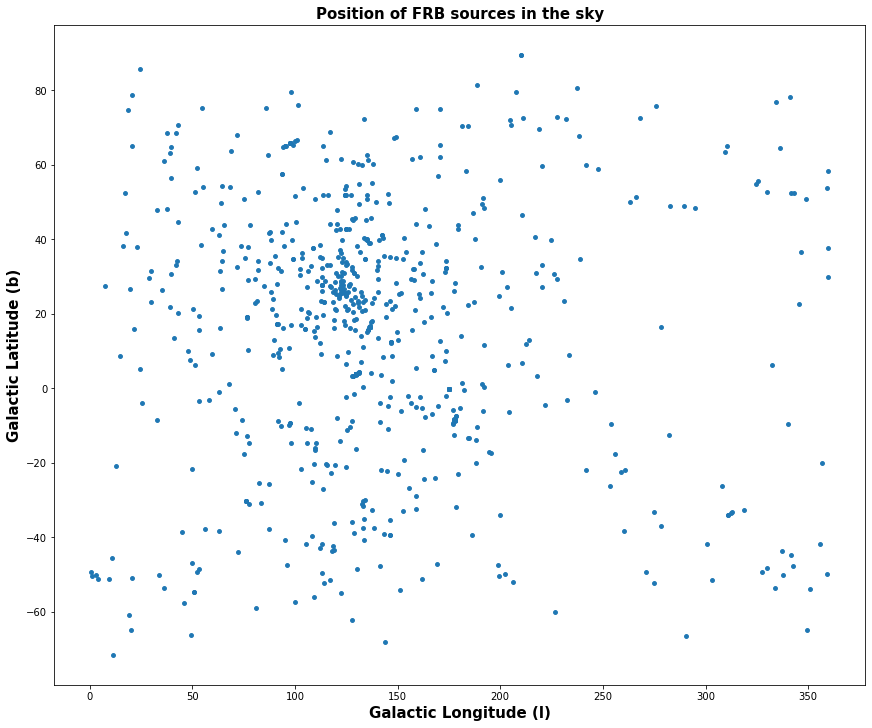

In [6]:
figure, ax_herta_pos = plt.subplots(figsize = (12,10), layout = 'constrained')
ax_herta_pos.scatter(herta_df['l'], herta_df['b'], s = 15)
ax_herta_pos.set_xlabel('Galactic Longitude (l)',  size = 15, weight = 'bold')
ax_herta_pos.set_ylabel('Galactic Latitude (b)', size = 15, weight = 'bold')
ax_herta_pos.set_title('Position of FRB sources in the sky', size = 15, weight = 'bold')

Unlike data from CHIME, it shows clustering of sources at ~30 North latitude and ~120 east longitutde. Is there any reason for clustering of sources at this location?

####  Flux Histogram

In [7]:
print('The maximum dispersion measure in the catalog is: ', max(herta_df['dm']))
print('The minimum dispersion measure in the catalog is: ', min(herta_df['dm']))

The maximum dispersion measure in the catalog is:  3037.7
The minimum dispersion measure in the catalog is:  87.75


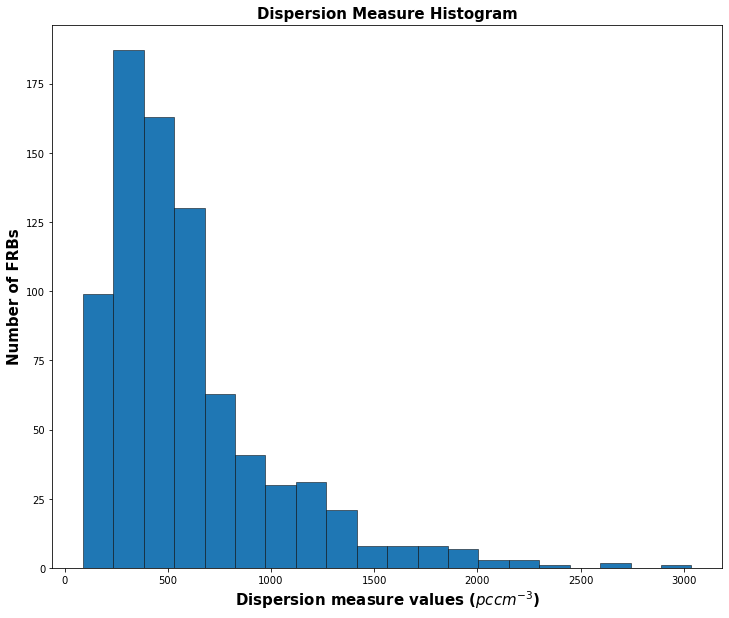

In [10]:
fig, ax_dm_hist = plt.subplots(figsize = (12, 10))
ax_dm_hist.hist(herta_df['dm'], bins=20, linewidth=0.5, edgecolor="black")
ax_dm_hist.set_xlabel('Dispersion measure values ($pc cm^{-3}$)', size = 15, weight = 'bold')
ax_dm_hist.set_ylabel('Number of FRBs', size = 15, weight = 'bold')
ax_dm_hist.set_title('Dispersion Measure Histogram', size = 15, weight = 'bold')
plt.show()

Here, most of the FRB sources detected are below 600 DM values. Does this have any connection with the clustering of FRB sources as in previous plot?  

This plot can be made more informative by picking proper range for DM values. But I don't have idea on what range of DM values are astronomically significant? Also, DM tells us about the distance of the source so there are some FRB sources detected quite far away. Maybe once we have sensitive eough equipment we will be able to detect more source from far away universe.

### Flux Histogram

In [87]:
flux_data = herta_df['flux'].astype(float) # Converted data values from string to float 

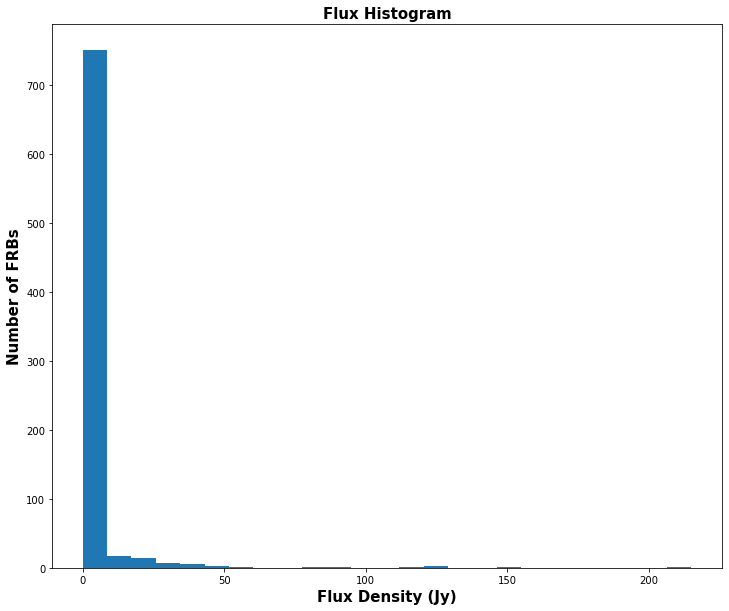

In [88]:
fig, ax_flux = plt.subplots(figsize = (12,10)) 
ax_flux.hist(flux_data, bins = 25)
ax_flux.set_xlabel('Flux Density (Jy)', size = 15, weight = 'bold')
ax_flux.set_ylabel('Number of FRBs', size = 15, weight = 'bold')
ax_flux.set_title('Flux Histogram', size = 15, weight = 'bold')
plt.show()


### Flux Density Vs Dispersion Measure Scatter Plot

Text(0.5, 1.0, 'Flux Vs DM')

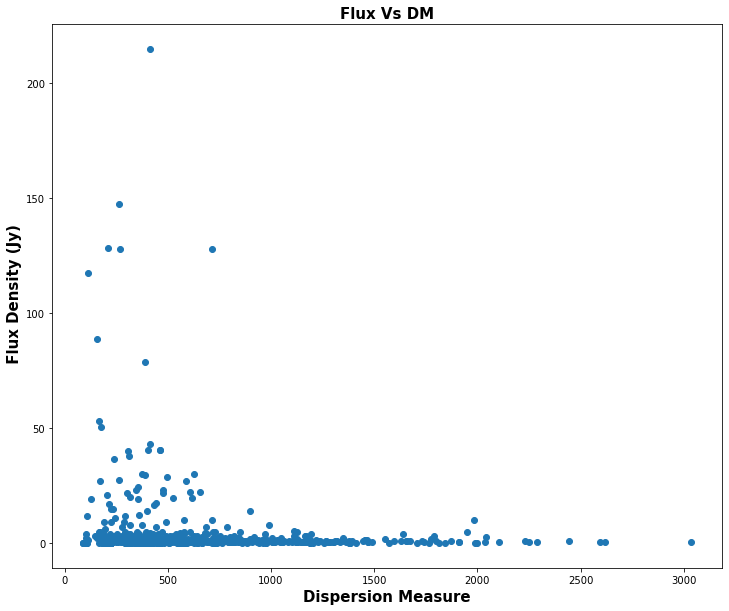

In [27]:
fig, ax_dm_fluc = plt.subplots(figsize = (12, 10))
ax_dm_fluc.scatter( herta_df['dm'], flux_data)
ax_dm_fluc.set_xlabel('Dispersion Measure', size = 15, weight = 'bold')
ax_dm_fluc.set_ylabel(' Flux Density (Jy)', size = 15, weight = 'bold')
ax_dm_fluc.set_title('Flux Vs DM', size = 15, weight = 'bold')

### DM Vs pulse width scatter plot

In [89]:
burst_width = herta_df['width'].astype(float)

Text(0.5, 1.0, 'DM Vs Burst width')

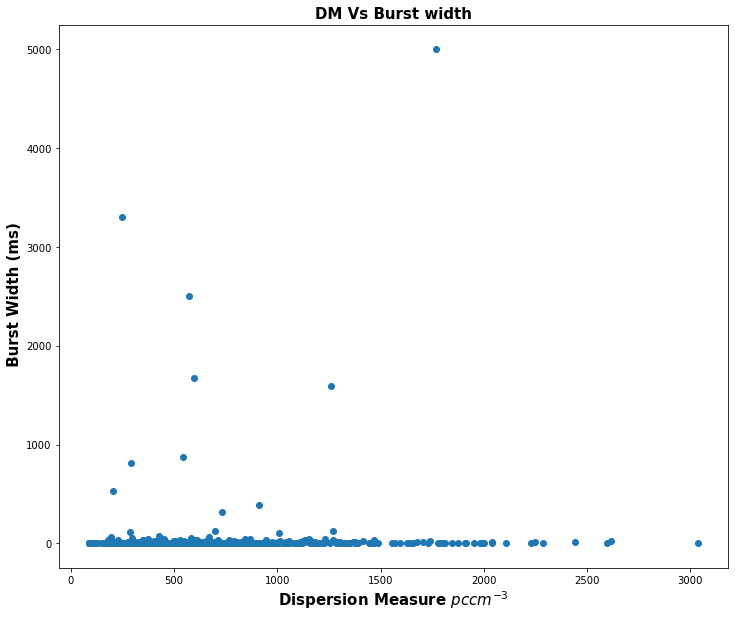

In [91]:
fig, ax_dm_width = plt.subplots(figsize = (12, 10))
ax_dm_width.scatter( herta_df['dm'], burst_width)
ax_dm_width.set_xlabel('Dispersion Measure $pc cm^{-3}$', size = 15, weight = 'bold')
ax_dm_width.set_ylabel(' Burst Width (ms)', size = 15, weight = 'bold')
ax_dm_width.set_title('DM Vs Burst width', size = 15, weight = 'bold')

In [69]:
np.log(0.0008)

-7.1308988302963465